## **Train.ipynb**

<p style='text-align:justify;'>[⚡️] This is the trainer notebook for the random forest classification model of the final project Classification of Fraudulent Credit Card Transactions using Random Forest Supervised Learning </p>


---
#### **Table of Contents**

1. [[🎯] Objective](#objective)
2. [[📦] Import Libraries](#imports)
3. [[🧹] Data Preprocessing](#preprocessing)
4. [[🔍] Exploratory Data Analysis](#eda)
5. [[🏋️‍♂️] Model Training](#training)
6. [[✅] Model Evaluation](#evaluation)
7. [[📁] Model Exporting](#export)
---

#### **Objective** <a id='objective'></a>

#### **[📦] Import Libraries** <a id='imports'></a>

In [1]:
import pandas as pd     # For data processing
import numpy as np      # For numerical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

plt.rcParams["figure.figsize"] = (10,6)

### **[🧹] Data Preprocessing** <a id='preprocessing'></a>
**Dataset:**

Dhanush Narayanan R. (April 2021). Credit Card Fraud, Version 1. Retrieved April 24, 2025, from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

In [2]:
### Project Constants
INPUT_PATH: str = "card_transdata.csv"
SPLIT_PERCENTAGE: float = 0.2



### Load the dataset
df: pd.DataFrame = pd.read_csv(INPUT_PATH)


df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
# Check if dataset includes null values
# If true, we will fill them with the average value
# Else, we proceed
null_count = df.isna().sum()
print('Null count: ', null_count)

Null count:  distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [12]:

# Check if dataset includes categorical columns
# If true, we will perform numeric encoding to them
# Else, we proceed
num_count = df.select_dtypes(exclude=["float64", "int64"])
print('Numerical count count: ', num_count)

Numerical count count:  Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1000000 rows x 0 columns]


In [14]:
# Perform Train-Test Split on dataset with 80/20
# Seaparate the feature columns and the target columns
# Call the test_train_split() function
X: pd.DataFrame = df.drop("fraud", axis=1)
y: pd.DataFrame = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=SPLIT_PERCENTAGE)

### **[🔍] Exploratory Data Analysis** <a id='eda'></a>

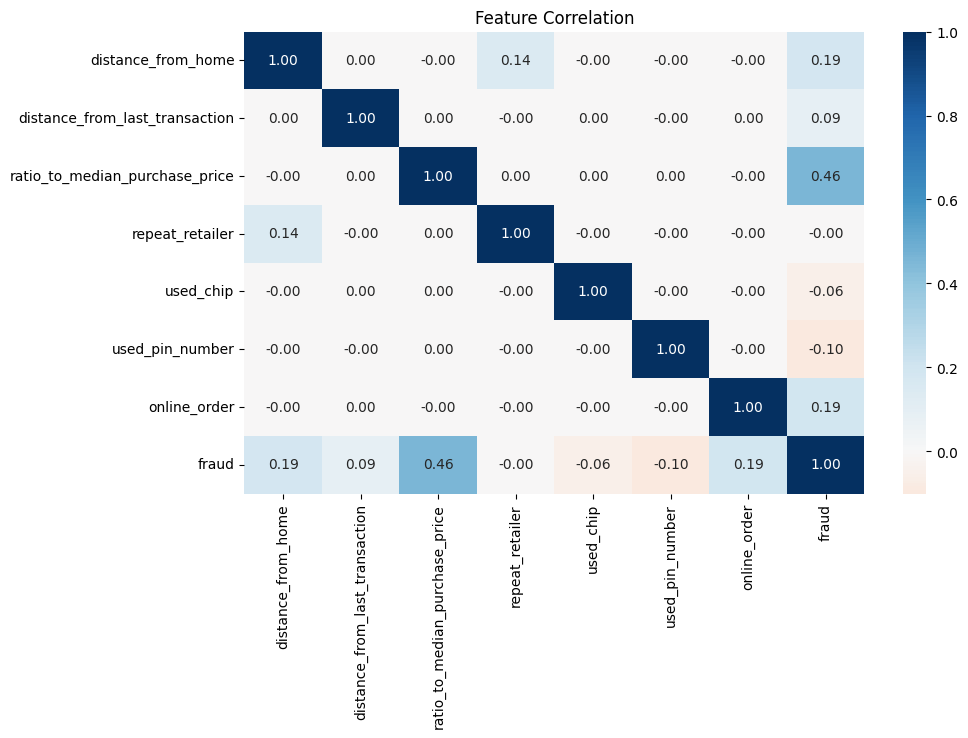

In [37]:
# Seaborn Correlation Heatmap
# TODO: Explain Heatmap here
plt.title("Feature Correlation")
sns.heatmap(df.corr(), cmap="RdBu", center=0, annot=True, fmt=".2f")
plt.show()

# Class Balance
# TODO: Explain Class Balance Here

### **[🏋️‍♂️] Model Training** <a id="training"> </a>

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### **[✅] Model Evaluation** <a id="evaluate"></a>

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182456
         1.0       1.00      1.00      1.00     17544

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



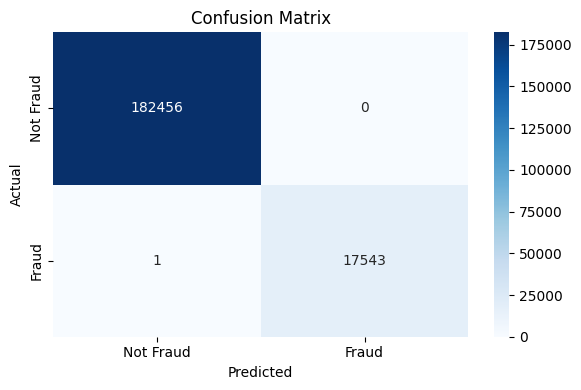

Accuracy Score: 0.999995


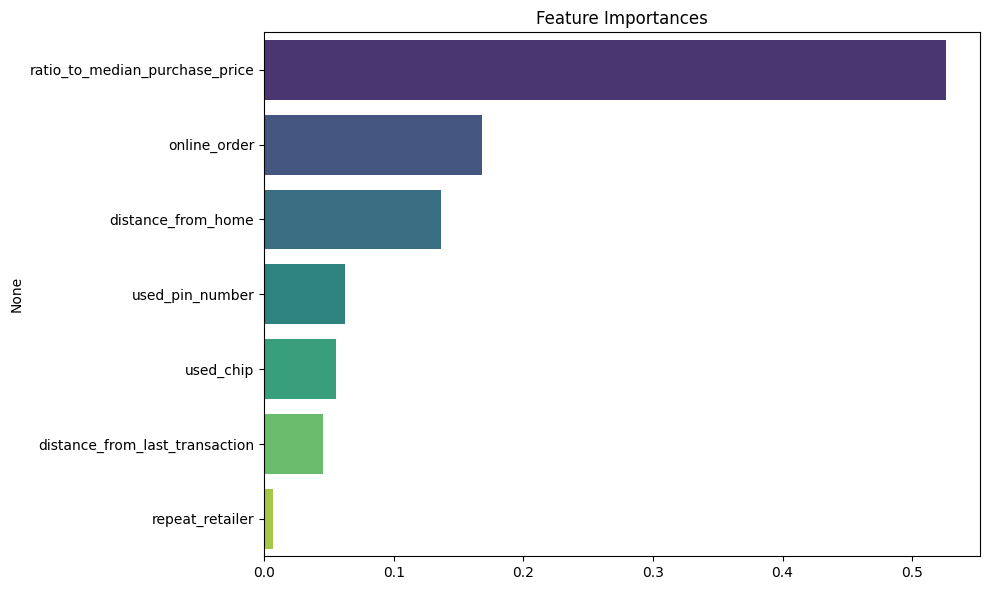

In [33]:
y_pred = rf.predict(X_test)
print("="*150)
print("Classification Report:\n", classification_report(y_test, y_pred))

print("="*150)
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud', 'Fraud']

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("="*150)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("="*150)
# Feature Importance
# TODO: Explain Feature Importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=features[indices], palette="viridis", hue=features[indices])
plt.tight_layout()
plt.show()

### **[📁] Model Exporting** <a id='export'></a>

In [18]:
joblib.dump(rf, "fraud_detection.pkl")
print("Model saved as 'fraud_detection")

Model saved as 'fraud_detection
